### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.STATUS.value_counts()
application_df.INCOME_AMT.value_counts()
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#Drop STATUS columns

application_df.drop(['EIN', 'NAME','STATUS'], axis = 1, inplace=True)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
aff_counts = application_df.AFFILIATION.value_counts()
aff_counts.head(40)

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_aff = list(aff_counts[aff_counts < 50].index)

# Replace in dataframe
for aff in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
Other                  50
Name: AFFILIATION, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

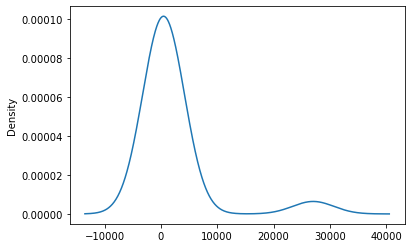

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C2500        1
C2150        1
C1236        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

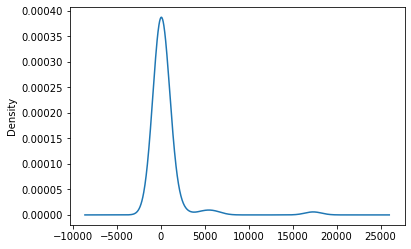

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
#change classification counts from 1883 to 2000
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3120      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 7,221
Trainable params: 7,221
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [23]:
# Train the model
#Change epochs from 100 to 40
fit_model = nn.fit(X_train,y_train,epochs=40,callbacks=[cp_callback])

Epoch 1/40
   32/25724 [..............................] - ETA: 1:04 - loss: 6067.4717 - acc: 0.4062
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 3s - loss: 21910.3991 - acc: 0.4912 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2368/25724 [=>............................] - ETA: 1s - loss: 30225.2833 - acc: 0.4747
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3776/25724 [===>..........................] - ETA: 1s - loss: 43637.4310 - acc: 0.4894
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 42291.4856 - acc: 0.5023
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6432/25724 [======>.......................] - ETA: 1s - loss: 40056.2778 - acc: 0.5089
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7808/25724 [========>.....................] - ETA: 0s - lo

13824/25724 [===============>..............] - ETA: 0s - loss: 2253.8827 - acc: 0.4930
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 10935.7442 - acc: 0.4936
Epoch 00003: saving model to checkpoints/weights.03.hdf5
16544/25724 [==================>...........] - ETA: 0s - loss: 15275.7587 - acc: 0.4911
Epoch 00003: saving model to checkpoints/weights.03.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 15297.4596 - acc: 0.4892
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 23856.3868 - acc: 0.4876
Epoch 00003: saving model to checkpoints/weights.03.hdf5
20576/25724 [======================>.......] - ETA: 0s - loss: 22299.6974 - acc: 0.4893
Epoch 00003: saving model to checkpoints/weights.03.hdf5
21952/25724 [==

 1408/25724 [>.............................] - ETA: 1s - loss: 1044.2550 - acc: 0.4751
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2848/25724 [==>...........................] - ETA: 0s - loss: 528.9464 - acc: 0.5077 
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4256/25724 [===>..........................] - ETA: 0s - loss: 466.2300 - acc: 0.5026
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 431.4261 - acc: 0.5102
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 7072/25724 [=======>......................] - ETA: 0s - loss: 539.5985 - acc: 0.5187
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 8512/25724 [========>.....................] - ETA: 0s - loss: 3256.0658 - acc: 0.5168
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9600/25724 [==========

16224/25724 [=================>............] - ETA: 0s - loss: 2071.1011 - acc: 0.4863
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 2144.2945 - acc: 0.4893
Epoch 00008: saving model to checkpoints/weights.08.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 1992.8176 - acc: 0.4921
Epoch 00008: saving model to checkpoints/weights.08.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 1959.3384 - acc: 0.4941
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 2046.3066 - acc: 0.4969
Epoch 00008: saving model to checkpoints/weights.08.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 2003.8597 - acc: 0.4999
Epoch 00008: saving model to checkpoints/weights.08.hdf5
24480/25724 [=======

 3840/25724 [===>..........................] - ETA: 0s - loss: 830.1397 - acc: 0.5070 
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 5248/25724 [=====>........................] - ETA: 0s - loss: 687.5782 - acc: 0.4950
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6624/25724 [======>.......................] - ETA: 0s - loss: 551.4952 - acc: 0.5032
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7936/25724 [========>.....................] - ETA: 0s - loss: 497.5210 - acc: 0.4946
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9440/25724 [==========>...................] - ETA: 0s - loss: 434.7468 - acc: 0.4969
Epoch 00011: saving model to checkpoints/weights.11.hdf5
10944/25724 [===========>..................] - ETA: 0s - loss: 383.9629 - acc: 0.5015
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12064/25724 [============

18944/25724 [=====================>........] - ETA: 0s - loss: 39.8972 - acc: 0.5286
Epoch 00013: saving model to checkpoints/weights.13.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 37.2505 - acc: 0.5284
Epoch 00013: saving model to checkpoints/weights.13.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 35.0399 - acc: 0.5283
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 32.9471 - acc: 0.5286
Epoch 00013: saving model to checkpoints/weights.13.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 31.0950 - acc: 0.5287
Epoch 00013: saving model to checkpoints/weights.13.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 29.5911 - acc: 0.5293
Epoch 14/40
   32/25724 [..............................] - ETA: 2s - loss: 0.5945 - acc: 0.7188
Epoch 00014: saving model to checkpoints/wei

 9344/25724 [=========>....................] - ETA: 0s - loss: 0.6944 - acc: 0.5317
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10784/25724 [===========>..................] - ETA: 0s - loss: 0.6932 - acc: 0.5357
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12224/25724 [=============>................] - ETA: 0s - loss: 0.6934 - acc: 0.5343
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.6933 - acc: 0.5342
Epoch 00016: saving model to checkpoints/weights.16.hdf5
14784/25724 [================>.............] - ETA: 0s - loss: 0.6930 - acc: 0.5349
Epoch 00016: saving model to checkpoints/weights.16.hdf5
16288/25724 [=================>............] - ETA: 0s - loss: 0.6930 - acc: 0.5346
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
17536/25724 [===================>.....

Epoch 19/40
   32/25724 [..............................] - ETA: 2s - loss: 0.6993 - acc: 0.4688
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 1408/25724 [>.............................] - ETA: 0s - loss: 0.6930 - acc: 0.5170
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2816/25724 [==>...........................] - ETA: 0s - loss: 0.6915 - acc: 0.5295
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4160/25724 [===>..........................] - ETA: 0s - loss: 0.6914 - acc: 0.5300
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.6922 - acc: 0.5233
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6880/25724 [=======>......................] - ETA: 0s - loss: 0.6916 - acc: 0.5288
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7936/25724 [========>....

16736/25724 [==================>...........] - ETA: 0s - loss: 0.6911 - acc: 0.5323
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.6912 - acc: 0.5316
Epoch 00021: saving model to checkpoints/weights.21.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.6911 - acc: 0.5320
Epoch 00021: saving model to checkpoints/weights.21.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.6913 - acc: 0.5309
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.6911 - acc: 0.5321
Epoch 00021: saving model to checkpoints/weights.21.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.6910 - acc: 0.5330
Epoch 00021: saving model to checkpoints/weights.21.hdf5
24928/25724 [=========================

 5248/25724 [=====>........................] - ETA: 0s - loss: 0.6713 - acc: 0.5347
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 6688/25724 [======>.......................] - ETA: 0s - loss: 0.6713 - acc: 0.5351
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8192/25724 [========>.....................] - ETA: 0s - loss: 0.6706 - acc: 0.5364
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.6698 - acc: 0.5370
Epoch 00024: saving model to checkpoints/weights.24.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.6698 - acc: 0.5353
Epoch 00024: saving model to checkpoints/weights.24.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.6697 - acc: 0.5349
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
13440/25724 [==============>..........

20608/25724 [=======================>......] - ETA: 0s - loss: 0.6924 - acc: 0.5170
Epoch 00026: saving model to checkpoints/weights.26.hdf5
21984/25724 [========================>.....] - ETA: 0s - loss: 0.6924 - acc: 0.5174
Epoch 00026: saving model to checkpoints/weights.26.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.6924 - acc: 0.5177
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.6922 - acc: 0.5190
Epoch 00026: saving model to checkpoints/weights.26.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.6920 - acc: 0.5212
Epoch 27/40
   32/25724 [..............................] - ETA: 1s - loss: 0.6946 - acc: 0.5000
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1472/25724 [>.............................] - ETA: 0s - loss: 0.6910 - acc: 0.5340
Epoch 00027: saving model to checkpoints/weights.2


Epoch 00029: saving model to checkpoints/weights.29.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.6912 - acc: 0.5317
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12192/25724 [=============>................] - ETA: 0s - loss: 0.6912 - acc: 0.5313
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13632/25724 [==============>...............] - ETA: 0s - loss: 0.6910 - acc: 0.5329
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.6912 - acc: 0.5312
Epoch 00029: saving model to checkpoints/weights.29.hdf5
16288/25724 [=================>............] - ETA: 0s - loss: 0.6914 - acc: 0.5299
Epoch 00029: saving model to checkpoints/weights.29.hdf5
17696/25724 [===================>..........] - ETA: 0s - loss: 0.6915 - acc: 0.5294
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoi

   32/25724 [..............................] - ETA: 1s - loss: 0.7078 - acc: 0.4062
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1184/25724 [>.............................] - ETA: 1s - loss: 0.6929 - acc: 0.5186
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 2560/25724 [=>............................] - ETA: 0s - loss: 0.6920 - acc: 0.5254
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 4000/25724 [===>..........................] - ETA: 0s - loss: 0.6915 - acc: 0.5293
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 5248/25724 [=====>........................] - ETA: 0s - loss: 0.6913 - acc: 0.5311
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 6720/25724 [======>.......................] - ETA: 0s - loss: 0.6909 - acc: 0.5338
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 8128/25724 [========>................

16256/25724 [=================>............] - ETA: 0s - loss: 0.6913 - acc: 0.5304
Epoch 00034: saving model to checkpoints/weights.34.hdf5
17696/25724 [===================>..........] - ETA: 0s - loss: 0.6912 - acc: 0.5312
Epoch 00034: saving model to checkpoints/weights.34.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.6910 - acc: 0.5332
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.6909 - acc: 0.5341
Epoch 00034: saving model to checkpoints/weights.34.hdf5
21824/25724 [========================>.....] - ETA: 0s - loss: 0.6909 - acc: 0.5335
Epoch 00034: saving model to checkpoints/weights.34.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.6910 - acc: 0.5330
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24448/25724 [=========================

 6656/25724 [======>.......................] - ETA: 0s - loss: 0.6907 - acc: 0.5349
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 8000/25724 [========>.....................] - ETA: 0s - loss: 0.6909 - acc: 0.5337
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.6905 - acc: 0.5363
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.6909 - acc: 0.5339
Epoch 00037: saving model to checkpoints/weights.37.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.6909 - acc: 0.5337
Epoch 00037: saving model to checkpoints/weights.37.hdf5
13536/25724 [==============>...............] - ETA: 0s - loss: 0.6906 - acc: 0.5360
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
14848/25724 [================>........

23104/25724 [=========================>....] - ETA: 0s - loss: 0.6911 - acc: 0.5322
Epoch 00039: saving model to checkpoints/weights.39.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.6910 - acc: 0.5328
Epoch 00039: saving model to checkpoints/weights.39.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.6911 - acc: 0.5324
Epoch 40/40
   32/25724 [..............................] - ETA: 2s - loss: 0.7079 - acc: 0.4062
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1312/25724 [>.............................] - ETA: 1s - loss: 0.6917 - acc: 0.5274
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.6899 - acc: 0.5411
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3616/25724 [===>..........................] - ETA: 0s - loss: 0.6901 - acc: 0.5398
Epoch 00040: saving model to checkpoints/weights.4

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.7326 - acc: 0.4272
Loss: 0.7326213024795577, Accuracy: 0.4271720051765442


In [25]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50


nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.40.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.7326 - acc: 0.4272
Loss: 0.7326213024795577, Accuracy: 0.4271720051765442


In [26]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity.h5")

# Drop status column
# Bin Affliation column
# change classification counts from 1883 to 2000